# Cleaning Data in Python

## Learning Objectives
#### 1. Load and view data in pandas
#### 2. Visually inspect data for errors and potential problems
#### 3. Tidy data for analysis and reshape it
#### 4. Combine datasets
#### 5. Clean data by using regular expressions and functions
#### 6. Test your data and be proactive in finding potential errors

In [1]:
# Some important attributes & functions

'''

df.head()
df.info()
df.columns
df.describe()
df.column.value_counts()
df.column.plot(kind='box')
df.column.hist()


pd.melt()
df.pivot()


df.column.str.contains()

'''

"\n\ndf.head()\ndf.info()\ndf.columns\ndf.describe()\ndf.column.value_counts()\ndf.column.plot(kind='box')\ndf.column.hist()\n\n\npd.melt()\ndf.pivot()\n\n\ndf.column.str.contains()\n\n"

# Exercise

#### 1. Read the BL-Flickr-Images-Book.csv file into a pandas dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('BL-Flickr-Images-Book.csv')

In [4]:
df.head()

Identifier             Edition Statement      Place of Publication  \
0         206                           NaN                    London   
1         216                           NaN  London; Virtue & Yorston   
2         218                           NaN                    London   
3         472                           NaN                    London   
4         480  A new edition, revised, etc.                    London   

  Date of Publication              Publisher  \
0         1879 [1878]       S. Tinsley & Co.   
1                1868           Virtue & Co.   
2                1869  Bradbury, Evans & Co.   
3                1851          James Darling   
4                1857   Wertheim & Macintosh   

                                               Title     Author  \
0                  Walter Forbes. [A novel.] By A. A      A. A.   
1  All for Greed. [A novel. The dedication signed...  A., A. A.   
2  Love the Avenger. By the author of “All for Gr...  A., A. A.   
3  Welsh Sketches, chiefly ecclesiastical, to the...  A., E. S.   
4  [The World in which I live, and my place in it...  A., E. S.   

                                   Contributors  Corporate Author  \
0                               FORBES, Walter.               NaN   
1  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
2  BLAZE DE BURY, Marie Pauline Rose - Baroness               NaN   
3                   Appleyard, Ernest Silvanus.               NaN   
4                           BROOME, John Henry.               NaN   

   Corporate Contributors Former owner  Engraver Issuance type  \
0                     NaN          NaN       NaN   monographic   
1                     NaN          NaN       NaN   monographic   
2                     NaN          NaN       NaN   monographic   
3                     NaN          NaN       NaN   monographic   
4                     NaN          NaN       NaN   monographic   

                                          Flickr URL  \
0  http://www.flickr.com/photos/britishlibrary/ta...   
1  http://www.flickr.com/photos/britishlibrary/ta...   
2  http://www.flickr.com/photos/britishlibrary/ta...   
3  http://www.flickr.com/photos/britishlibrary/ta...   
4  http://www.flickr.com/photos/britishlibrary/ta...   

                            Shelfmarks  
0    British Library HMNTS 12641.b.30.  
1    British Library HMNTS 12626.cc.2.  
2    British Library HMNTS 12625.dd.1.  
3  British Library HMNTS 10369.bbb.15.  
4     British Library HMNTS 9007.d.28.

#### 2. Understand the data better by using attributes like shape, dtypes, and methods like describe(), info() etc.

In [5]:
df.shape

(8287, 15)

In [6]:
df.dtypes

Identifier                  int64
Edition Statement          object
Place of Publication       object
Date of Publication        object
Publisher                  object
Title                      object
Author                     object
Contributors               object
Corporate Author          float64
Corporate Contributors    float64
Former owner               object
Engraver                  float64
Issuance type              object
Flickr URL                 object
Shelfmarks                 object
dtype: object

In [7]:
df.describe()

Identifier  Corporate Author  Corporate Contributors  Engraver
count  8.287000e+03               0.0                     0.0       0.0
mean   2.017344e+06               NaN                     NaN       NaN
std    1.190379e+06               NaN                     NaN       NaN
min    2.060000e+02               NaN                     NaN       NaN
25%    9.157875e+05               NaN                     NaN       NaN
50%    2.043707e+06               NaN                     NaN       NaN
75%    3.047430e+06               NaN                     NaN       NaN
max    4.160339e+06               NaN                     NaN       NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
Identifier                8287 non-null int64
Edition Statement         773 non-null object
Place of Publication      8287 non-null object
Date of Publication       8106 non-null object
Publisher                 4092 non-null object
Title                     8287 non-null object
Author                    6509 non-null object
Contributors              8287 non-null object
Corporate Author          0 non-null float64
Corporate Contributors    0 non-null float64
Former owner              1 non-null object
Engraver                  0 non-null float64
Issuance type             8287 non-null object
Flickr URL                8287 non-null object
Shelfmarks                8287 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 971.2+ KB


#### 3. Drop the columns that do not add much information i.e. have a lot of missing values

In [9]:
to_drop = ['Edition Statement',
         'Corporate Author',
         'Corporate Contributors',
         'Former owner',
         'Engraver',
         'Contributors',
         'Issuance type',
         'Shelfmarks']

df.drop(to_drop, inplace=True, axis=1)

#### 4. Check if the Identifier column is unique

In [10]:
df['Identifier'].is_unique

True

#### 5. Tidy up the datew of publication field, use regular expression to extract the year from this field, change datatype to numeric and reassign it to date of publication field

In [11]:
year_publication = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)


 to read more about str.extract https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

In [12]:
df['Date of Publication']=pd.to_numeric(year_publication)

In [40]:
! ls

BL-Flickr-Images-Book.csv
M3W3_workshop_exercise.ipynb
M3W3_workshop_exercise_solutions-Copy1.ipynb
M3W3_workshop_exercise_solutions.ipynb
README.md
factbook.db


In [13]:
df.head()

Identifier      Place of Publication  Date of Publication  \
0         206                    London               1879.0   
1         216  London; Virtue & Yorston               1868.0   
2         218                    London               1869.0   
3         472                    London               1851.0   
4         480                    London               1857.0   

               Publisher                                              Title  \
0       S. Tinsley & Co.                  Walter Forbes. [A novel.] By A. A   
1           Virtue & Co.  All for Greed. [A novel. The dedication signed...   
2  Bradbury, Evans & Co.  Love the Avenger. By the author of “All for Gr...   
3          James Darling  Welsh Sketches, chiefly ecclesiastical, to the...   
4   Wertheim & Macintosh  [The World in which I live, and my place in it...   

      Author                                         Flickr URL  
0      A. A.  http://www.flickr.com/photos/britishlibrary/ta...  
1  A., A. A.  http://www.flickr.com/photos/britishlibrary/ta...  
2  A., A. A.  http://www.flickr.com/photos/britishlibrary/ta...  
3  A., E. S.  http://www.flickr.com/photos/britishlibrary/ta...  
4  A., E. S.  http://www.flickr.com/photos/britishlibrary/ta...

#### 6. Plot a histogram & box plot to view distribution of year of publication, try using pandas plotting functions that you learnt this week. 

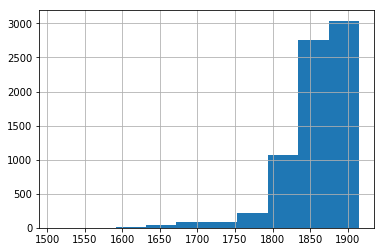

In [14]:
df['Date of Publication'].hist()

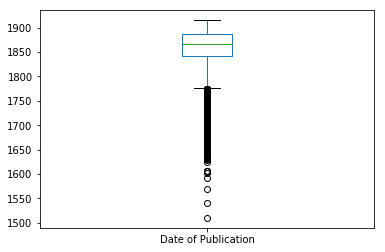

In [15]:
df['Date of Publication'].plot(kind='box')

#### 7. Clip extreme values for Date of Publication

In [19]:
df['Date of Publication']=df['Date of Publication'].clip(lower=1775)

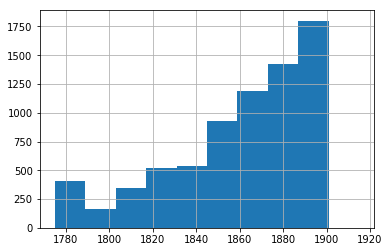

In [20]:
df['Date of Publication'].hist()

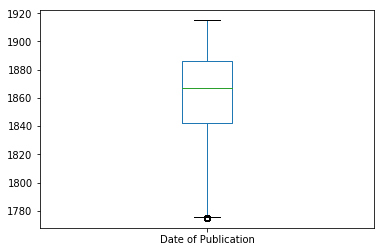

In [21]:
df['Date of Publication'].plot(kind='box')

#### 8. Create two additional fields London and Oxford to indicate whether the book was published in those place. 
<I> Hint: use str.contains </I>

In [22]:
df['Place of Publication'].value_counts().head()

London       3868
Paris         479
Edinburgh     208
New York      177
Leipzig       119
Name: Place of Publication, dtype: int64

In [23]:
df['London']=df['Place of Publication'].str.contains('London')

In [24]:
df['Oxford']=df['Place of Publication'].str.contains('Oxford')

#### 9. Create pivot table output with rows as different years of publication, columns London or not, with values indicationing count of publications

In [26]:
pivot_df=df.pivot_table(values='Identifier',index='Date of Publication', columns='London',aggfunc='count')

In [27]:
pivot_df.head()

London               False  True 
Date of Publication              
1775.0                37.0  285.0
1776.0                 3.0    4.0
1777.0                 2.0    6.0
1778.0                 2.0    9.0
1779.0                 2.0    7.0

#### 10. Bonus question! - merge facts & cities data sets from factbook.db using pandas merge. Read data using sqllite3

more about merge here : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [28]:
import sqlite3 as sql

In [29]:
conn=sql.connect('factbook.db')

In [30]:
facts_df=pd.read_sql_query('select * from facts',conn)

In [31]:
facts_df.head(2)

id code         name      area  area_land  area_water  population  \
0   1   af  Afghanistan  652230.0   652230.0         0.0  32564342.0   
1   2   al      Albania   28748.0    27398.0      1350.0   3029278.0   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30

In [32]:
cities_df=pd.read_sql_query('select * from cities',conn)

In [33]:
cities_df.head(2)

id          name  population  capital facts_id
0   1    Oranjestad       37000        1      216
1   2  Saint John'S       27000        1        6

In [34]:
facts_df.rename(columns={'id':'facts_id'},inplace=True)

In [35]:
facts_df.dtypes

facts_id               int64
code                  object
name                  object
area                 float64
area_land            float64
area_water           float64
population           float64
population_growth    float64
birth_rate           float64
death_rate           float64
migration_rate       float64
dtype: object

In [36]:
cities_df.dtypes

id             int64
name          object
population     int64
capital        int64
facts_id      object
dtype: object

In [37]:
cities_df['facts_id']=pd.to_numeric(cities_df['facts_id'])

In [38]:
merged=pd.merge(cities_df,facts_df,how='left',on='facts_id')

In [39]:
merged.head()

id        name_x  population_x  capital  facts_id code  \
0   1    Oranjestad         37000        1       216   aa   
1   2  Saint John'S         27000        1         6   ac   
2   3     Abu Dhabi        942000        1       184   ae   
3   4         Dubai       1978000        0       184   ae   
4   5       Sharjah        983000        0       184   ae   

                 name_y     area  area_land  area_water  population_y  \
0                 Aruba    180.0      180.0         0.0      112162.0   
1   Antigua and Barbuda    442.0      442.0         0.0       92436.0   
2  United Arab Emirates  83600.0    83600.0         0.0     5779760.0   
3  United Arab Emirates  83600.0    83600.0         0.0     5779760.0   
4  United Arab Emirates  83600.0    83600.0         0.0     5779760.0   

   population_growth  birth_rate  death_rate  migration_rate  
0               1.33       12.56        8.18            8.92  
1               1.24       15.85        5.69            2.21  
2               2.58       15.43        1.97           12.36  
3               2.58       15.43        1.97           12.36  
4               2.58       15.43        1.97           12.36

## Assignment
https://campus.elu.nl/courses/2/assignments/31?module_item_id=237